**Roll no: 20K-0374**

**Assignment 1**

**Applied Machine Learning**


The dataset is centered around Alzheimer's disease patients and encompasses a range of features related to their demographic, cognitive, and neuroimaging characteristics. Here's a brief description of each feature:

Group: This categorical variable likely represents different classes or groups within the dataset, possibly indicating the disease status of the patients (e.g., "Nondemented," "Demented," "Converted").

Age: This numerical feature represents the age of the patients, indicating their age at the time of data collection.

EDUC: The "Years of Education" feature reflects the number of years of formal education completed by the patients.

SES: This numerical variable likely represents the socioeconomic status of the patients on a scale from 1 to 5.

MMSE: The "Mini Mental State Examination" is a widely used cognitive assessment tool. This numerical feature likely captures cognitive performance.

CDR: The "Clinical Dementia Rating" is another measure of cognitive and functional impairment in Alzheimer's disease patients.

eTIV: "Estimated total intracranial volume" is a neuroimaging metric that estimates the total volume of the brain within the cranial cavity.

nWBV: "Normalized Whole Brain Volume" likely represents the volume of the brain normalized to a reference value, helping account for differences in head size.

ASF: "Atlas Scaling Factor" may be a scaling factor applied to brain imaging data to standardize measurements.

This dataset appears to be a valuable resource for studying Alzheimer's disease and understanding the relationship between various patient characteristics and cognitive outcomes. Further analysis and modeling can provide insights into the factors associated with the disease and its progression.

**TASK 1**
**Data Summarization**

In [6]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
##for creating data exploration graphs within this file
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)


In [7]:
from google.colab import files
uploaded = files.upload()

Saving alzheimer.csv to alzheimer.csv


In [8]:
dataset=pd.read_csv('alzheimer.csv')

## print shape of dataset with  rows and columns
print(dataset.shape)

(373, 10)


In [10]:
##print top 5 records
dataset.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


Group is a target for models

Group --> Class

Age --> Age

EDUC --> Years of Education

SES --> Socioeconomic Status / 1-5

MMSE --> Mini Mental State Examination

CDR --> Clinical Dementia Rating

eTIV --> Estimated total intracranial volume

nWBV --> Normalize Whole Brain Volume

ASF --> Atlas Scaling Factor

You can use it as a categorical variable:

->Group

->Age

->EDA

In [13]:
# import panda as pd
# df = pd.read_csv(dataset)

# Calculate basic summary statistics for numeric columns
numeric_summary = dataset.describe()

# Display the summary statistics
print(numeric_summary)

              Age        EDUC         SES        MMSE         CDR  \
count  373.000000  373.000000  354.000000  371.000000  373.000000   
mean    77.013405   14.597855    2.460452   27.342318    0.290885   
std      7.640957    2.876339    1.134005    3.683244    0.374557   
min     60.000000    6.000000    1.000000    4.000000    0.000000   
25%     71.000000   12.000000    2.000000   27.000000    0.000000   
50%     77.000000   15.000000    2.000000   29.000000    0.000000   
75%     82.000000   16.000000    3.000000   30.000000    0.500000   
max     98.000000   23.000000    5.000000   30.000000    2.000000   

              eTIV        nWBV         ASF  
count   373.000000  373.000000  373.000000  
mean   1488.128686    0.729568    1.195461  
std     176.139286    0.037135    0.138092  
min    1106.000000    0.644000    0.876000  
25%    1357.000000    0.700000    1.099000  
50%    1470.000000    0.729000    1.194000  
75%    1597.000000    0.756000    1.293000  
max    2004.000000

**Count the frequency of unique values for categorical variables:**

You can achieve this by looping through the columns in your DataFrame and using the value_counts() method for each column.

In [14]:
# Loop through columns and count unique values for categorical variables
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Check if the column is categorical (object type)
        unique_counts = dataset[column].value_counts()
        print(f"Unique counts for {column}:\n{unique_counts}\n")

Unique counts for Group:
Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

Unique counts for M/F:
F    213
M    160
Name: M/F, dtype: int64




This information tells you about the distribution of the "Group" variable in your dataset. It indicates that there are three unique categories in the "Group" column, and the counts show how many times each category appears. For example, there are 190 instances of "Nondemented," 146 instances of "Demented," and 37 instances of "Converted." This information can be useful for understanding the balance or distribution of different groups in your data.

This information tells you about the distribution of gender (Male and Female) in your dataset. It shows that there are two unique categories in the "M/F" column, and the counts indicate how many times each category appears. For instance, there are 213 instances of "Female" and 160 instances of "Male." This information can be useful when analyzing the gender distribution in your dataset.

In [18]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 2),  ' % missing values')

SES 0.05  % missing values
MMSE 0.01  % missing values


**Task 2 Data Visualization**

**Create histograms or density plots to visualize the distribution of numerical
variables.**

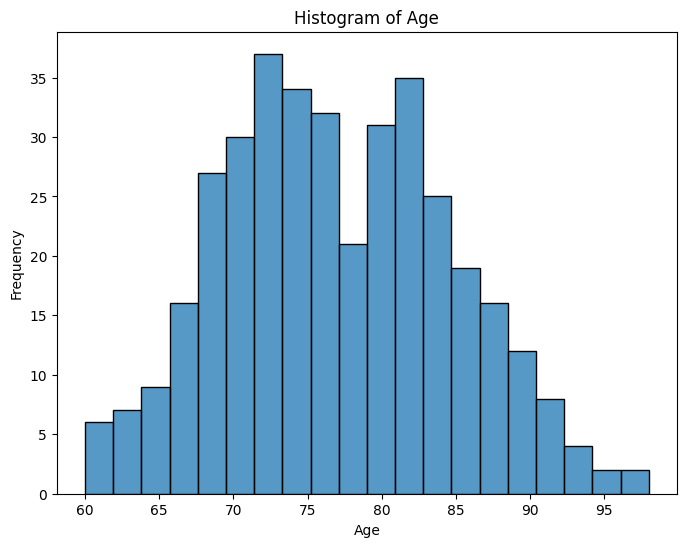

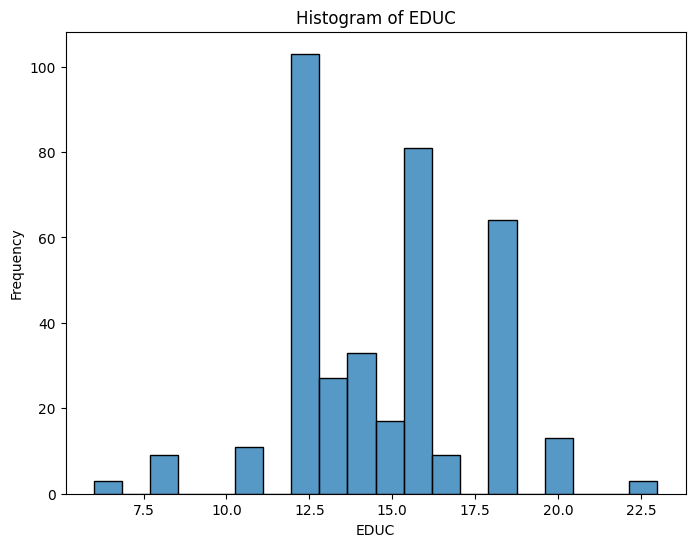

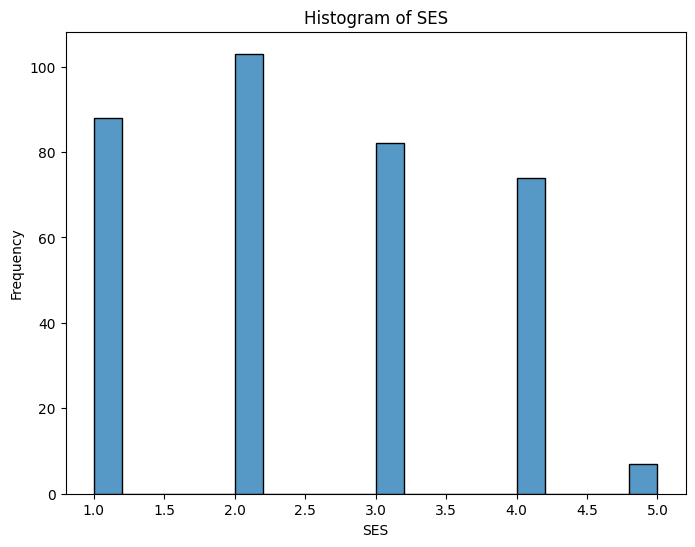

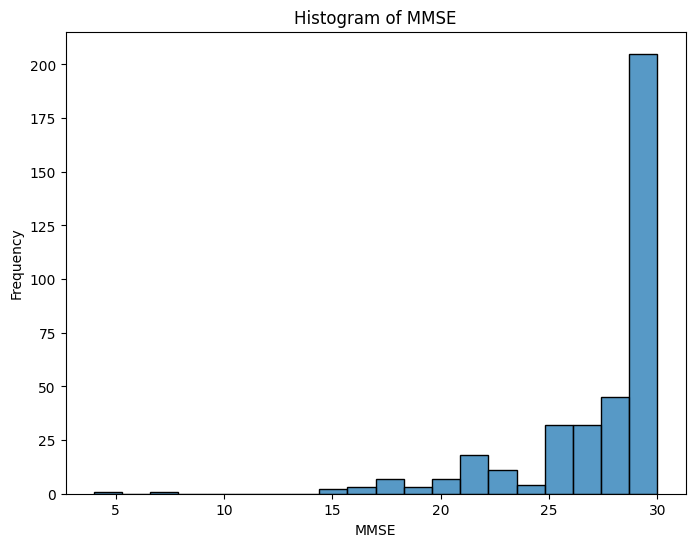

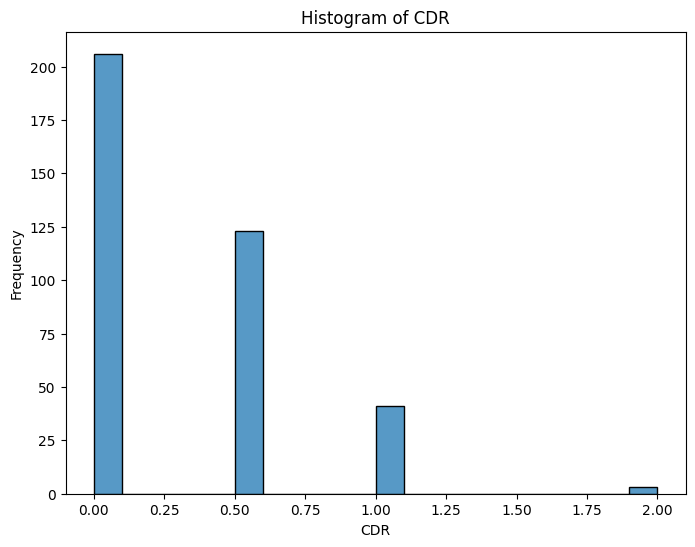

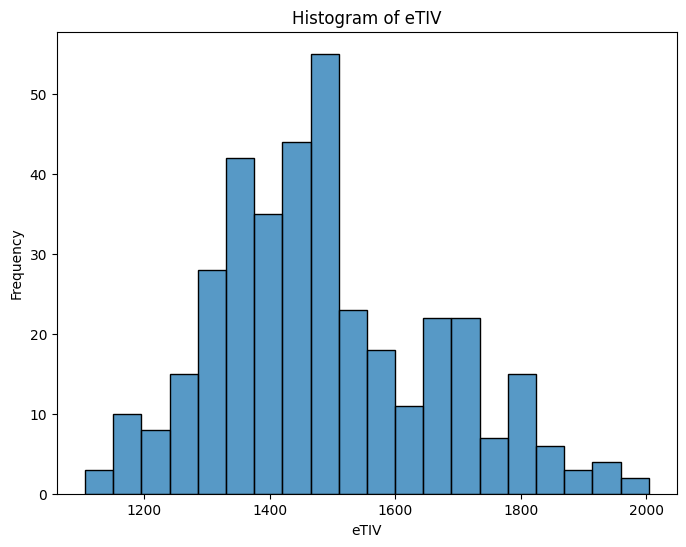

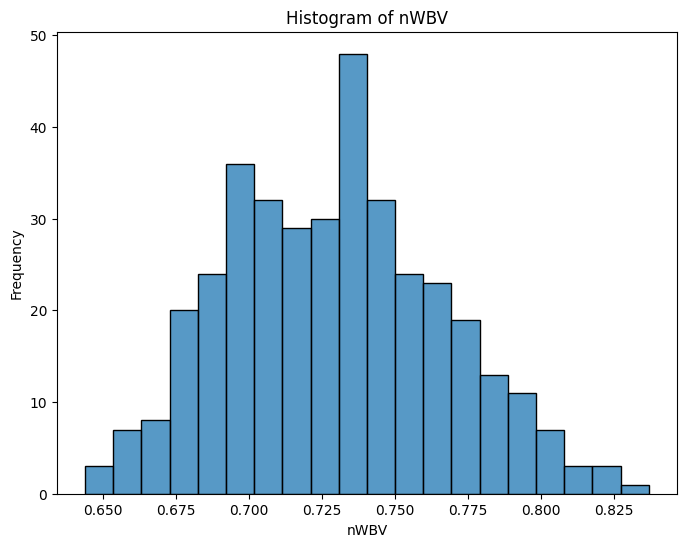

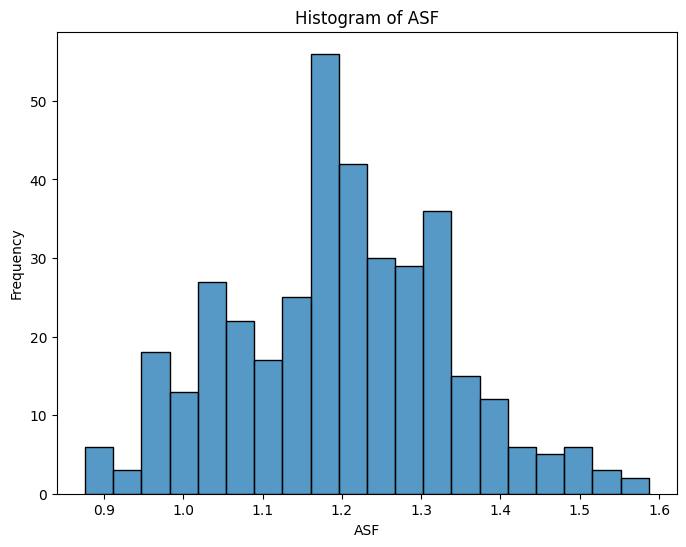

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the numerical columns you want to visualize
numerical_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Set the number of bins for the histograms
num_bins = 20  # You can adjust this number as needed

# Create histograms for each numerical column without the KDE curve
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.histplot(data=dataset, x=column, bins=num_bins)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


**Generate bar plots or pie charts to visualize the distribution of categorical
variables.**

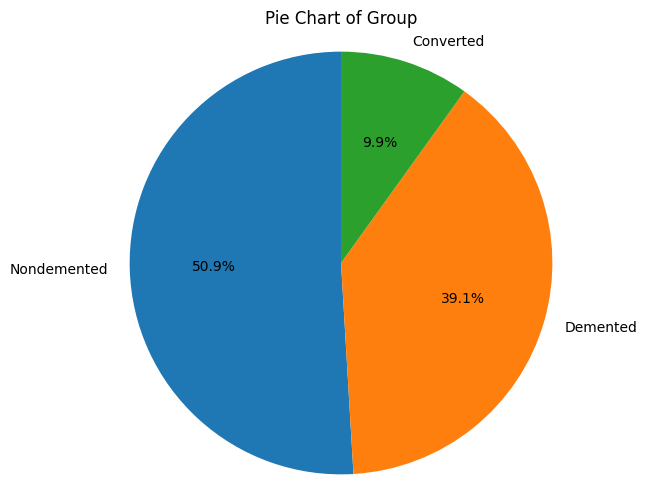

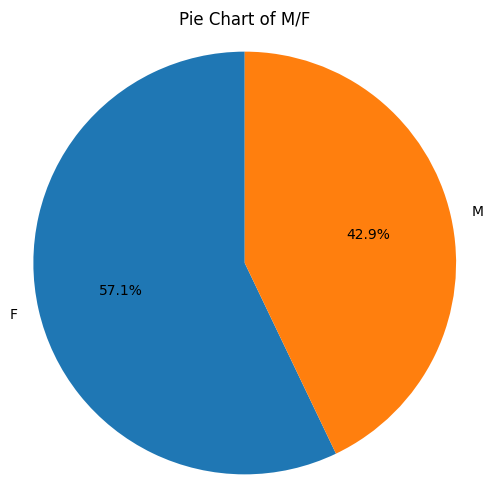

In [22]:
import matplotlib.pyplot as plt

# Specify the categorical columns you want to visualize
categorical_columns = ['Group', 'M/F']  # Replace with your column names

# Create pie charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 6))  # Set the figure size
    category_counts = dataset[column].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


**Create box plots to identify outliers and understand the spread of data.**

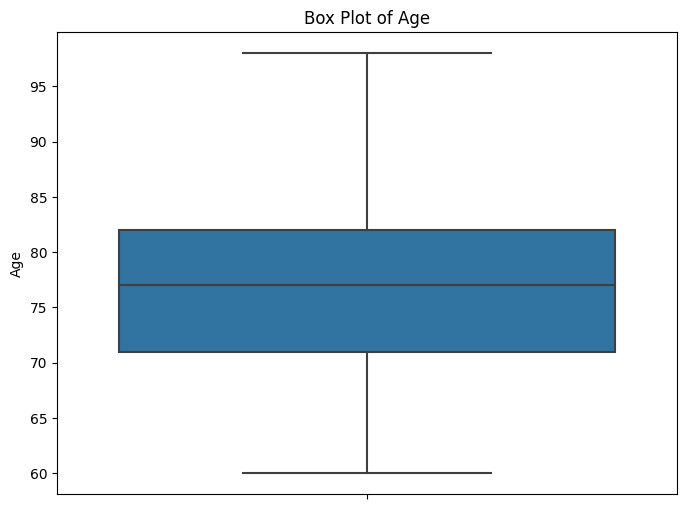

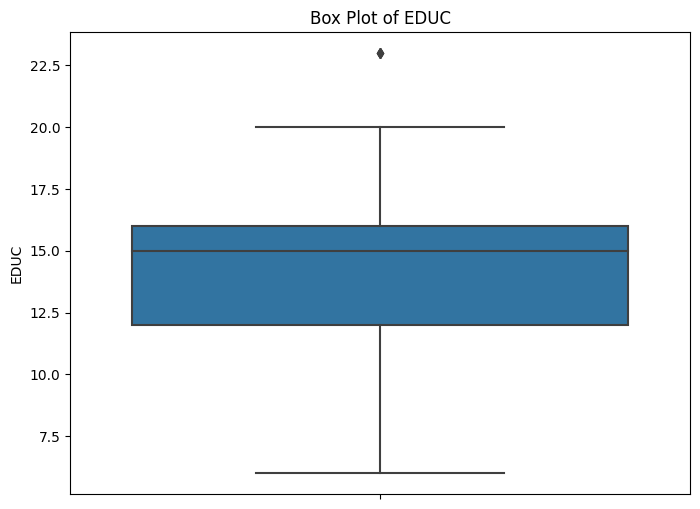

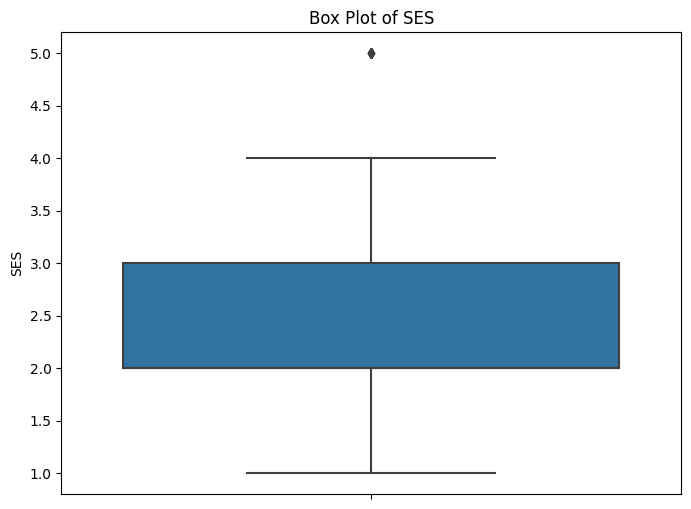

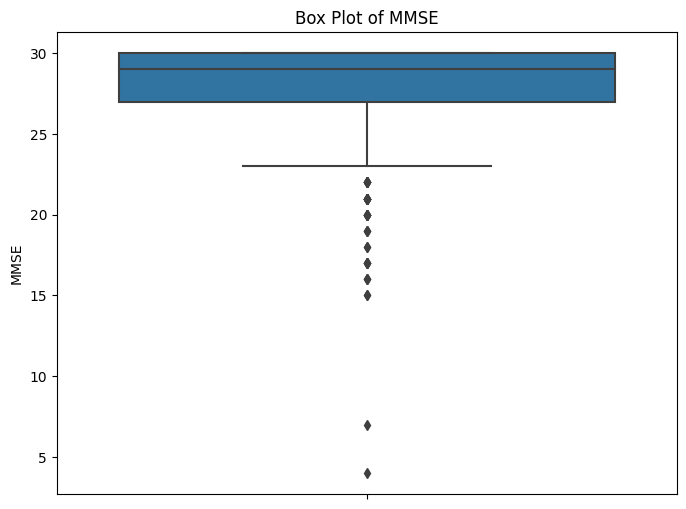

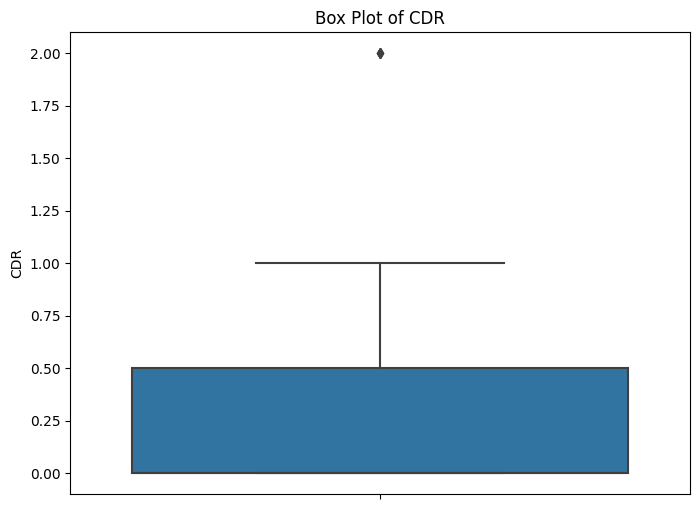

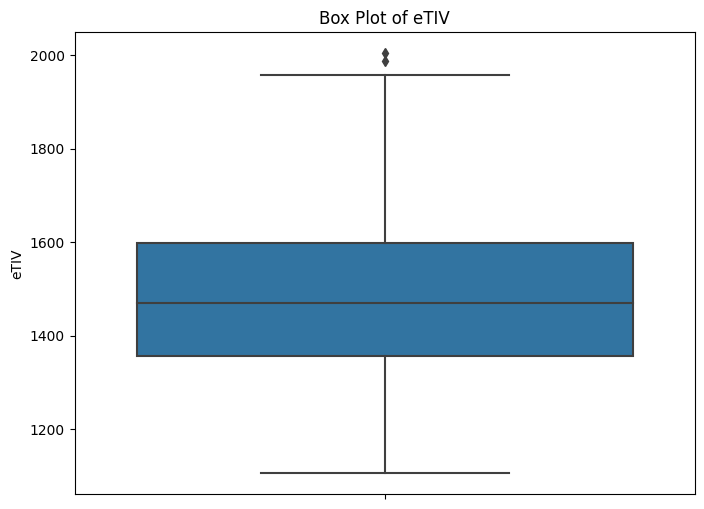

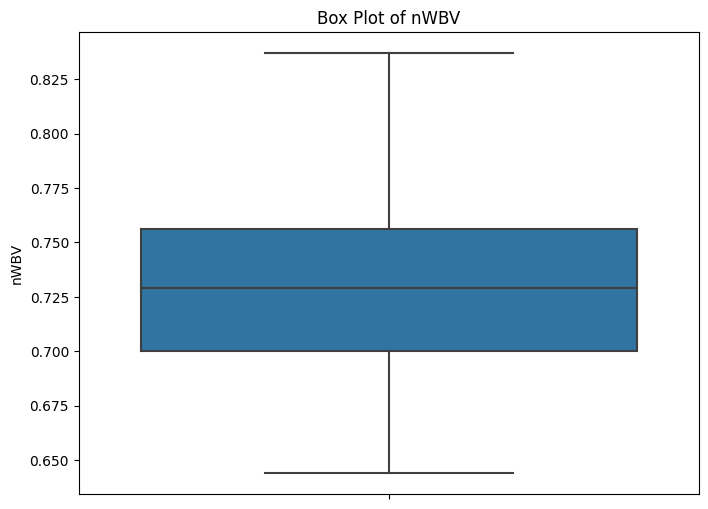

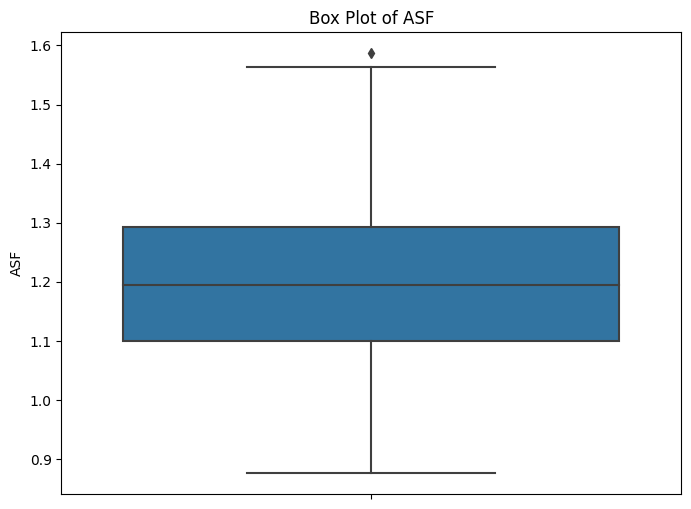

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the numerical columns you want to create box plots for
numerical_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.boxplot(data=dataset, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()


Understand the spread of data

Construct scatter plots to explore relationships between pairs of variables.

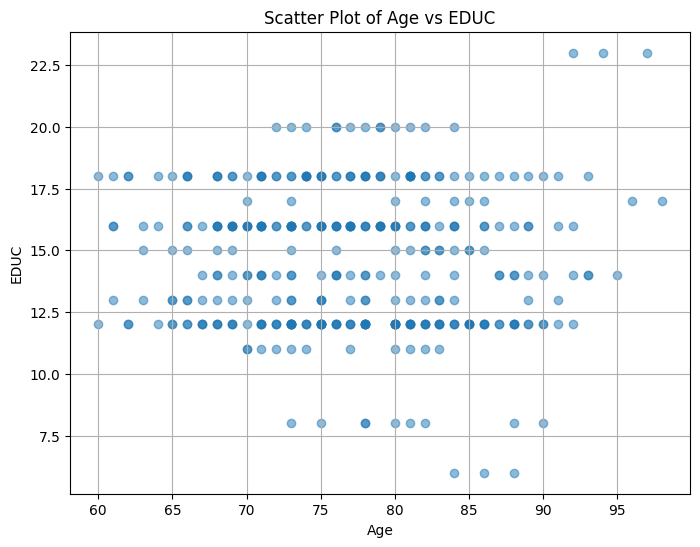

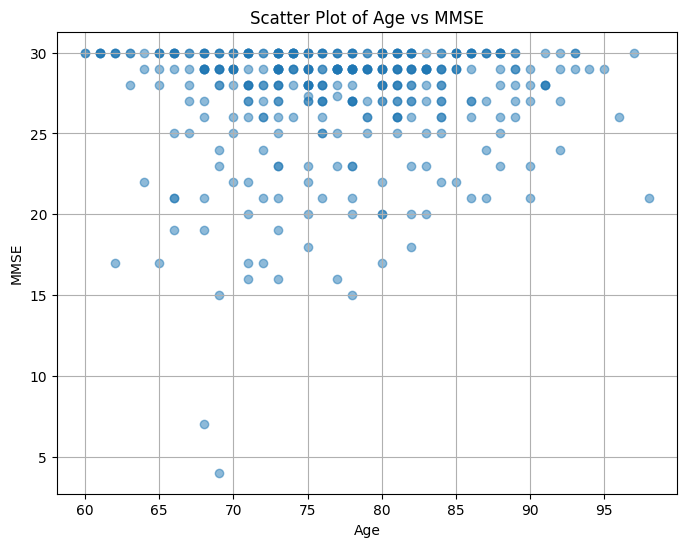

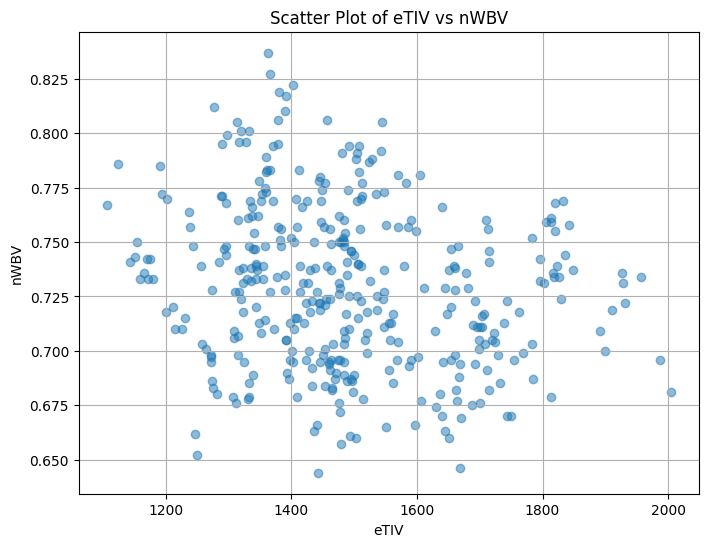

In [29]:
import matplotlib.pyplot as plt

# Specify the pairs of numerical columns you want to explore
pairs_to_plot = [('Age', 'EDUC'), ('Age', 'MMSE'), ('eTIV', 'nWBV')]  # Replace with your column pairs

# Create scatter plots for each pair of numerical columns
for pair in pairs_to_plot:
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.scatter(dataset[pair[0]], dataset[pair[1]], alpha=0.5)
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.grid(True)
    plt.show()


**Use heatmaps to visualize correlations between variables.**

<ipython-input-25-52026530ebcc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


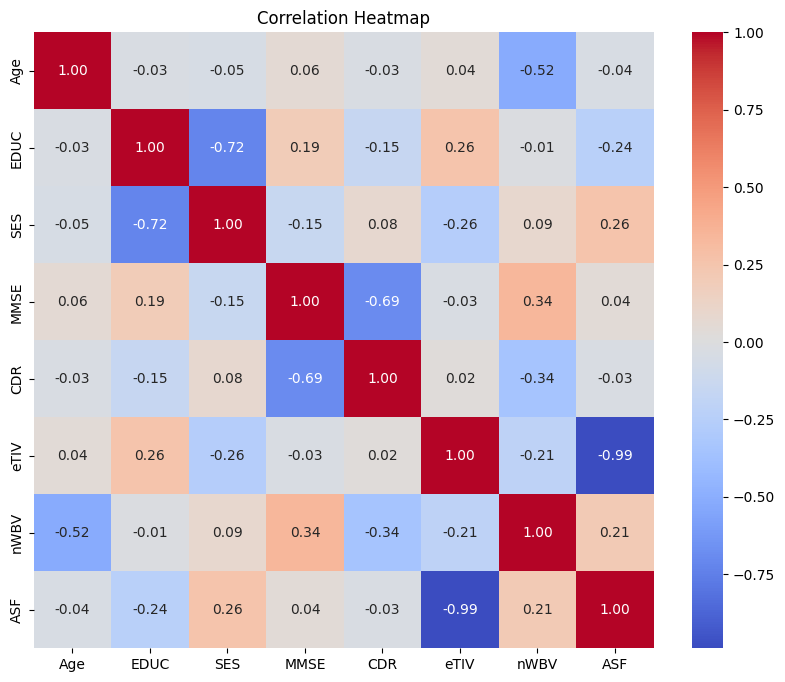

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical variables
correlation_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Task 3: Handling Missing Data**

 The pattern of missing data in 'SES' and 'MMSE' appears to be random which means that there are no clear systematic patterns or dependencies that would explain the missingness. Common approaches like mean imputation or deletion are appropriate given the low percentage and random pattern.


We can implement mean imputation and row deletion for 'SES' and 'MMSE' using Python and pandas:

**Mean Imputation**

In [27]:
# Impute missing values with the mean for 'SES' and 'MMSE'
dataset['SES'].fillna(dataset['SES'].mean(), inplace=True)
dataset['MMSE'].fillna(dataset['MMSE'].mean(), inplace=True)


**Row Deletion**



In [28]:
# Delete rows with missing values for 'SES' and 'MMSE'
dataset.dropna(subset=['SES', 'MMSE'], inplace=True)


Since deletion removes missing values but can lead to loss of information, so we opt for imputation.

**Task 4: Outlier Detection and Treatment**

To treat the outliers detected in the box plots in task 2, we must have them aligned with our main objective of the project. Depending on our analysis goals, you can then decide whether to remove, transform, or treat them.


Our Goal: Explore the relationships and patterns within the dataset.

Context: Conduct EDA to understand how variables like age, education, and brain measures are associated with cognitive impairment and Alzheimer's diagnosis.

Outliers are observed in the following box plots:

EDUC

SES

MMSE

CDR

eTIV

ASF

Sometimes outliers can be important as they carry valuable insights to treat real world problems so we cannot rremove them. Its better to use transformation on the columns that are causing outliers and reduce skewness to make it more balanced and normal.

**Task 5: Data Distribution and Analysis**

Visualize the data distribution and assess skewness and kurtosis. The plots shown below show the skewness and kurtosis of the columns that have experienced outliers.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
%matplotlib inline


In [31]:
# Calculate skewness and kurtosis for each numerical column
skewness = dataset[numerical_columns].apply(lambda x: skew(x.dropna()))
kurt = dataset[numerical_columns].apply(lambda x: kurtosis(x.dropna()))

# Create a DataFrame to display skewness and kurtosis values
distribution_stats = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
print(distribution_stats)


      Skewness  Kurtosis
Age   0.141130 -0.421404
EDUC -0.025872 -0.031864
SES   0.226404 -0.974873
MMSE -2.362852  7.454868
CDR   1.314007  2.159465
eTIV  0.494881 -0.139715
nWBV  0.233642 -0.429491
ASF   0.083114 -0.245061


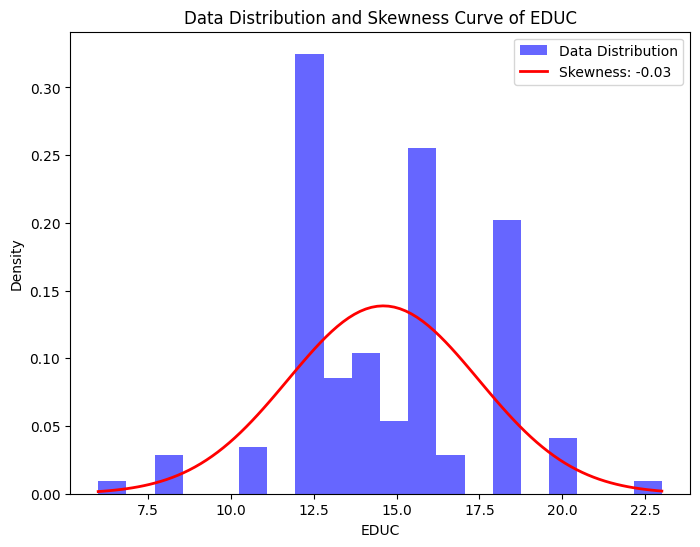

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline



# Choose the numerical column for analysis
column_to_analyze = 'EDUC'  # Change to the column you want to analyze

# Create a histogram to visualize the data distribution
plt.figure(figsize=(8, 6))
plt.hist(dataset[column_to_analyze], bins=20, density=True, alpha=0.6, color='b', label='Data Distribution')

# Overlay a skewness curve
data = dataset[column_to_analyze].dropna()
skewness = skew(data)
x = np.linspace(min(data), max(data), 100)
pdf = np.exp(-((x - data.mean()) / data.std())**2 / 2) / (data.std() * np.sqrt(2 * np.pi))
plt.plot(x, pdf, 'r', lw=2, label=f'Skewness: {skewness:.2f}')

# Add labels and legend
plt.title(f'Data Distribution and Skewness Curve of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Density')
plt.legend(loc='best')

# Show the plot
plt.show()


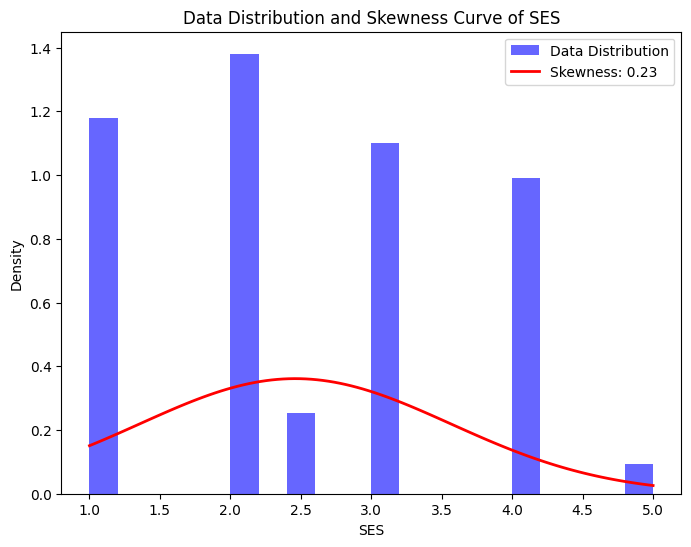

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline



# Choose the numerical column for analysis
column_to_analyze = 'SES'  # Change to the column you want to analyze

# Create a histogram to visualize the data distribution
plt.figure(figsize=(8, 6))
plt.hist(dataset[column_to_analyze], bins=20, density=True, alpha=0.6, color='b', label='Data Distribution')

# Overlay a skewness curve
data = dataset[column_to_analyze].dropna()
skewness = skew(data)
x = np.linspace(min(data), max(data), 100)
pdf = np.exp(-((x - data.mean()) / data.std())**2 / 2) / (data.std() * np.sqrt(2 * np.pi))
plt.plot(x, pdf, 'r', lw=2, label=f'Skewness: {skewness:.2f}')

# Add labels and legend
plt.title(f'Data Distribution and Skewness Curve of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Density')
plt.legend(loc='best')

# Show the plot
plt.show()


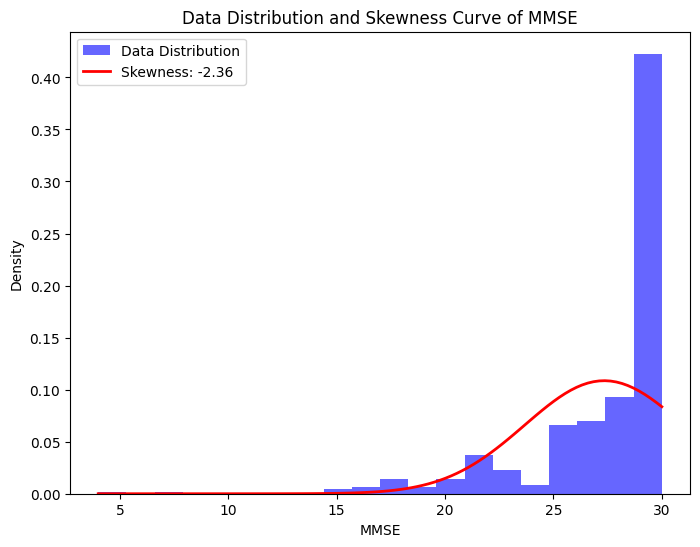

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline



# Choose the numerical column for analysis
column_to_analyze = 'MMSE'  # Change to the column you want to analyze

# Create a histogram to visualize the data distribution
plt.figure(figsize=(8, 6))
plt.hist(dataset[column_to_analyze], bins=20, density=True, alpha=0.6, color='b', label='Data Distribution')

# Overlay a skewness curve
data = dataset[column_to_analyze].dropna()
skewness = skew(data)
x = np.linspace(min(data), max(data), 100)
pdf = np.exp(-((x - data.mean()) / data.std())**2 / 2) / (data.std() * np.sqrt(2 * np.pi))
plt.plot(x, pdf, 'r', lw=2, label=f'Skewness: {skewness:.2f}')

# Add labels and legend
plt.title(f'Data Distribution and Skewness Curve of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Density')
plt.legend(loc='best')

# Show the plot
plt.show()


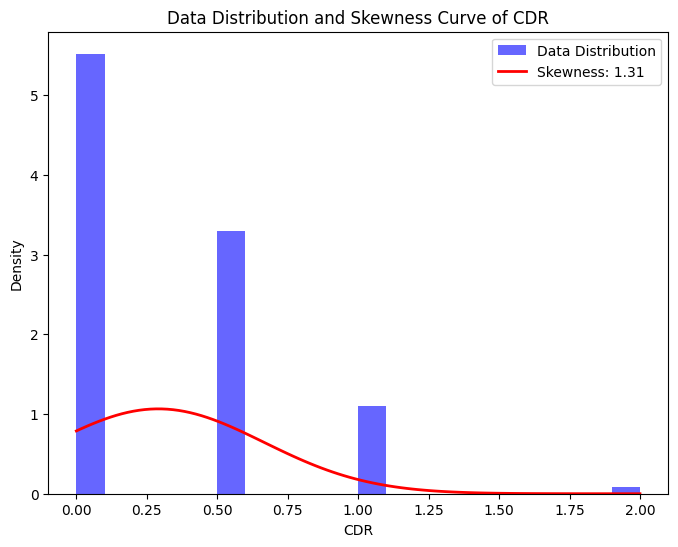

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline



# Choose the numerical column for analysis
column_to_analyze = 'CDR'  # Change to the column you want to analyze

# Create a histogram to visualize the data distribution
plt.figure(figsize=(8, 6))
plt.hist(dataset[column_to_analyze], bins=20, density=True, alpha=0.6, color='b', label='Data Distribution')

# Overlay a skewness curve
data = dataset[column_to_analyze].dropna()
skewness = skew(data)
x = np.linspace(min(data), max(data), 100)
pdf = np.exp(-((x - data.mean()) / data.std())**2 / 2) / (data.std() * np.sqrt(2 * np.pi))
plt.plot(x, pdf, 'r', lw=2, label=f'Skewness: {skewness:.2f}')

# Add labels and legend
plt.title(f'Data Distribution and Skewness Curve of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Density')
plt.legend(loc='best')

# Show the plot
plt.show()


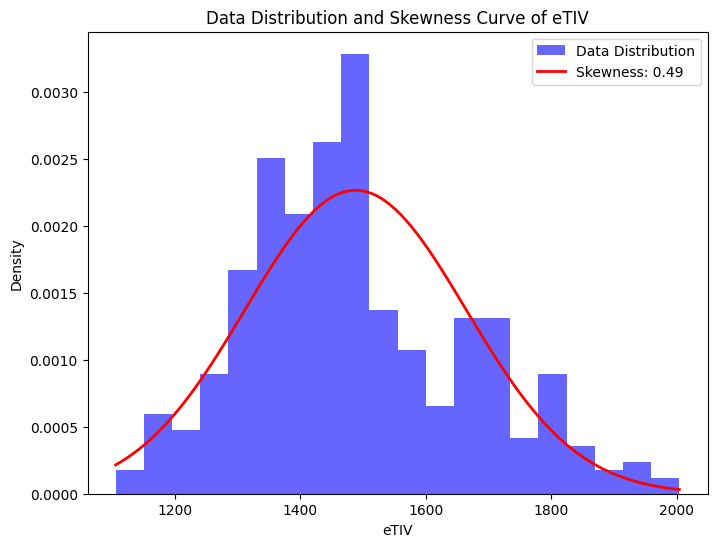

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline



# Choose the numerical column for analysis
column_to_analyze = 'eTIV'  # Change to the column you want to analyze

# Create a histogram to visualize the data distribution
plt.figure(figsize=(8, 6))
plt.hist(dataset[column_to_analyze], bins=20, density=True, alpha=0.6, color='b', label='Data Distribution')

# Overlay a skewness curve
data = dataset[column_to_analyze].dropna()
skewness = skew(data)
x = np.linspace(min(data), max(data), 100)
pdf = np.exp(-((x - data.mean()) / data.std())**2 / 2) / (data.std() * np.sqrt(2 * np.pi))
plt.plot(x, pdf, 'r', lw=2, label=f'Skewness: {skewness:.2f}')

# Add labels and legend
plt.title(f'Data Distribution and Skewness Curve of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Density')
plt.legend(loc='best')

# Show the plot
plt.show()


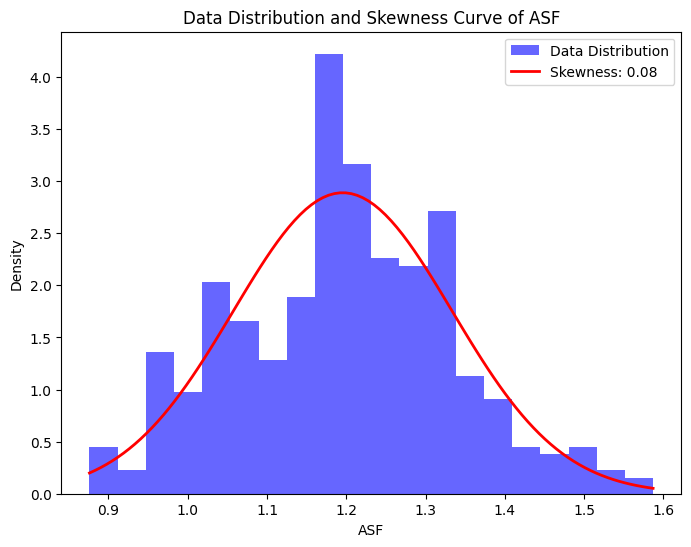

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline



# Choose the numerical column for analysis
column_to_analyze = 'ASF'  # Change to the column you want to analyze

# Create a histogram to visualize the data distribution
plt.figure(figsize=(8, 6))
plt.hist(dataset[column_to_analyze], bins=20, density=True, alpha=0.6, color='b', label='Data Distribution')

# Overlay a skewness curve
data = dataset[column_to_analyze].dropna()
skewness = skew(data)
x = np.linspace(min(data), max(data), 100)
pdf = np.exp(-((x - data.mean()) / data.std())**2 / 2) / (data.std() * np.sqrt(2 * np.pi))
plt.plot(x, pdf, 'r', lw=2, label=f'Skewness: {skewness:.2f}')

# Add labels and legend
plt.title(f'Data Distribution and Skewness Curve of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Density')
plt.legend(loc='best')

# Show the plot
plt.show()


**TASK 6: Bivariate Analysis**

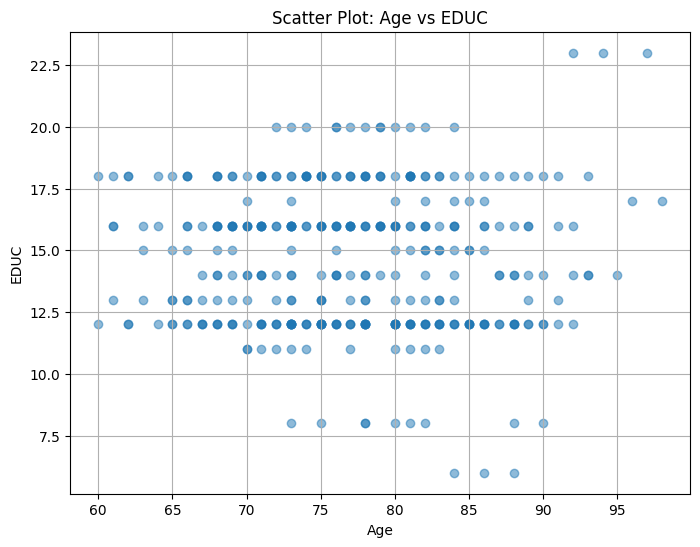

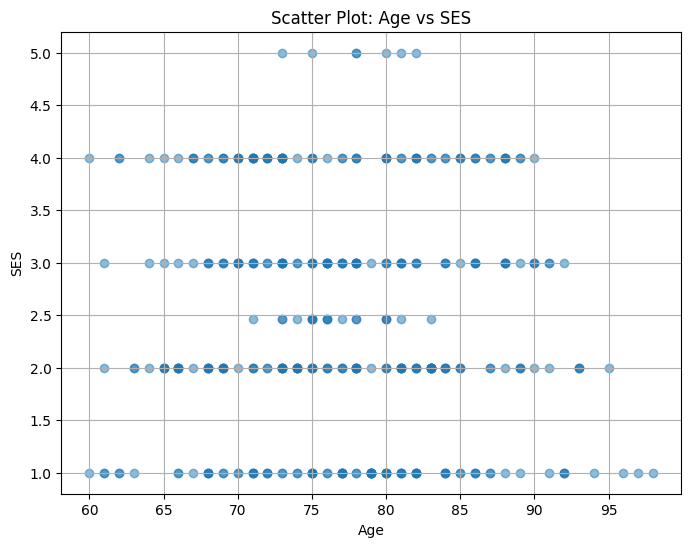

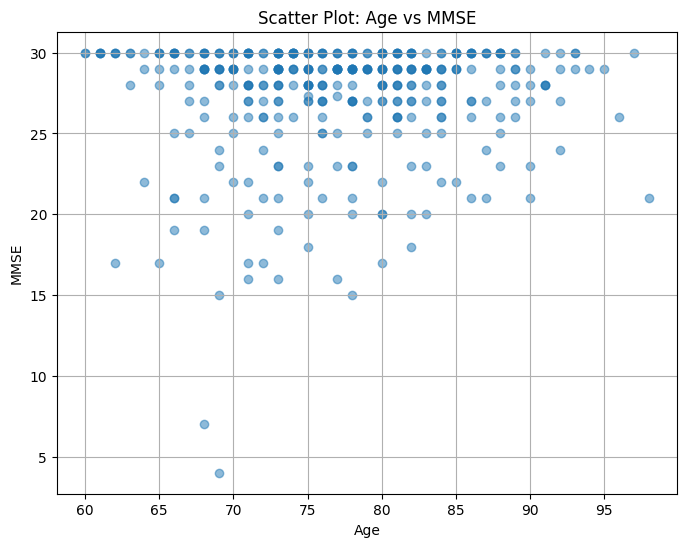

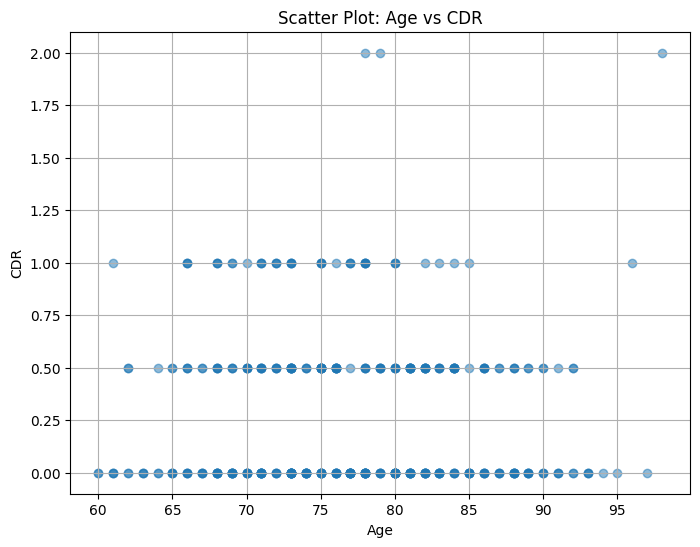

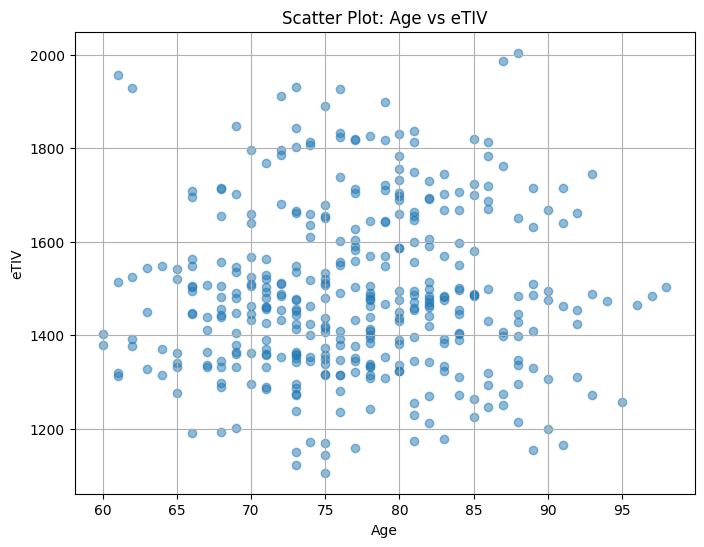

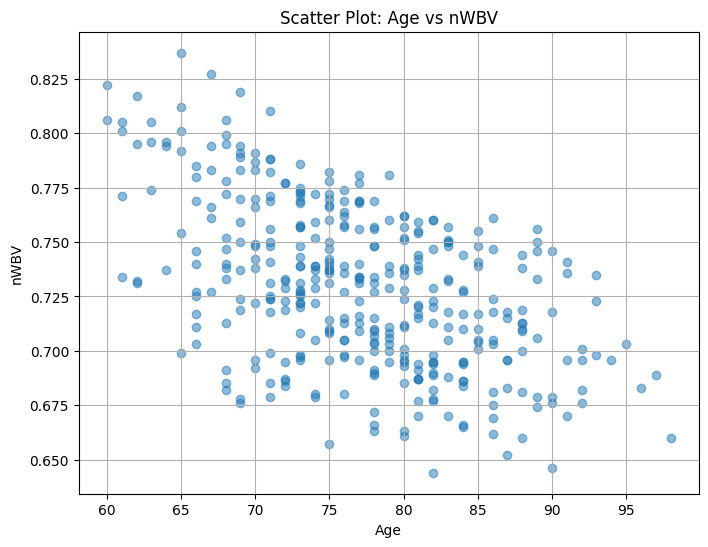

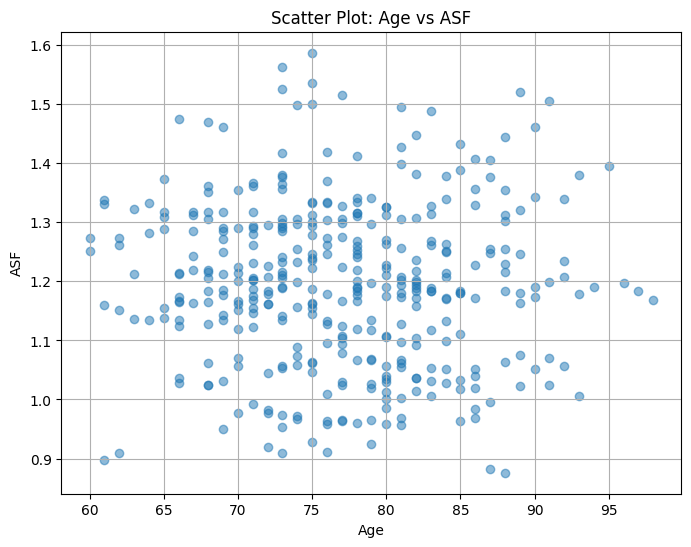

In [43]:
import matplotlib.pyplot as plt

# List of numerical variables (excluding 'Age')
numerical_variables = ['EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Create scatter plots for each numerical variable against 'Age'
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset['Age'], dataset[var], alpha=0.5)
    plt.title(f'Scatter Plot: Age vs {var}')
    plt.xlabel('Age')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()


Plotting all the scatter plots against the ages comprehends that the age range of 70-85 is found to have tendencies of all the factors.

**Task 7 Grouping and Aggregation**

In [47]:
# Identify and list categorical feature names
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

# Print the list of categorical features
print(categorical_features)


['Group', 'M/F']


In [48]:
dataset[categorical_features].head()

,Group,M/F
0,Nondemented,M
1,Nondemented,M
2,Demented,M
3,Demented,M
4,Demented,M


In [49]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Group and number of categories are 3
The feature is M/F and number of categories are 2


In [50]:
# Group data by the 'Group' variable and calculate summary statistics
grouped_by_group = dataset.groupby('Group').agg({
    'Age': ['mean', 'median', 'std'],
    'MMSE': ['mean', 'median', 'std'],
    # Add other numerical columns and summary statistics as needed
}).reset_index()

# Display the summary statistics for 'Group'
print(grouped_by_group)


         Group        Age                        MMSE                 
                     mean median       std       mean median       std
0    Converted  79.756757   81.0  7.425203  28.675676   29.0  1.564432
1     Demented  76.260274   76.0  6.940193  24.552634   26.0  4.478110
2  Nondemented  77.057895   77.0  8.096104  29.226316   29.0  0.882722


In [51]:
# Group data by the 'M/F' variable and calculate summary statistics
grouped_by_gender = dataset.groupby('M/F').agg({
    'Age': ['mean', 'median', 'std'],
    'MMSE': ['mean', 'median', 'std'],
    # Add other numerical columns and summary statistics as needed
}).reset_index()

# Display the summary statistics for 'M/F'
print(grouped_by_gender)


  M/F        Age                        MMSE                 
            mean median       std       mean median       std
0   F  77.262911   77.0  7.889352  27.871759   29.0  3.015183
1   M  76.681250   77.0  7.308453  26.637500   28.0  4.309544


In the 'Group' analysis, it appears that the 'Demented' group has the lowest mean MMSE scores, indicating more cognitive impairment, while the 'Converted' group has relatively higher age and moderate MMSE scores.

In the 'M/F' analysis, there is a subtle difference in mean age and MMSE scores between females and males, with females having a slightly higher mean age and slightly lower mean MMSE scores.

These findings suggest that 'Group' and 'M/F' categories may play a role in understanding age and MMSE score variations within the dataset. Further statistical tests, such as t-tests or ANOVA, can be conducted to determine if these differences are statistically significant. Additionally, visualization techniques like box plots or bar charts may help provide a clearer visual representation of these differences and patterns.

**Task 8 Data Transformation**

In [52]:
import numpy as np

# Apply a logarithmic transformation to a numerical column (e.g., 'Age')
dataset['Age_log'] = np.log(dataset['Age'])


In [53]:
# Perform one-hot encoding for the 'Group' categorical variable
dataset = pd.get_dummies(dataset, columns=['Group'], prefix=['Group'])


In [54]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'M/F' categorical variable
dataset['M/F_encoded'] = label_encoder.fit_transform(dataset['M/F'])


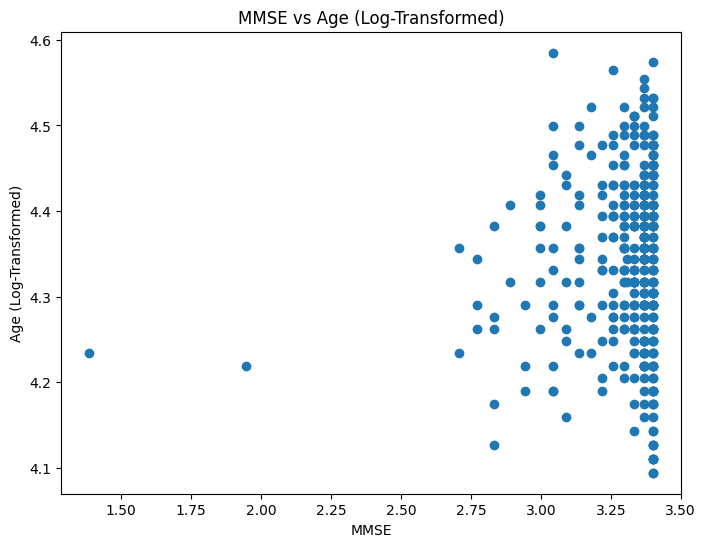

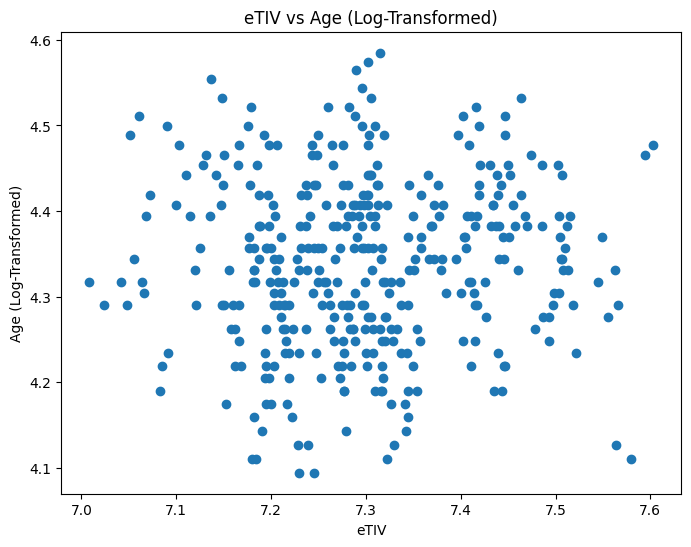

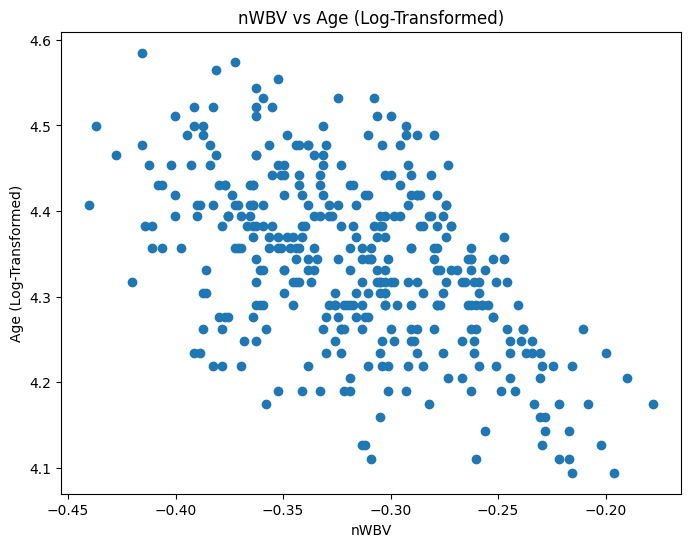

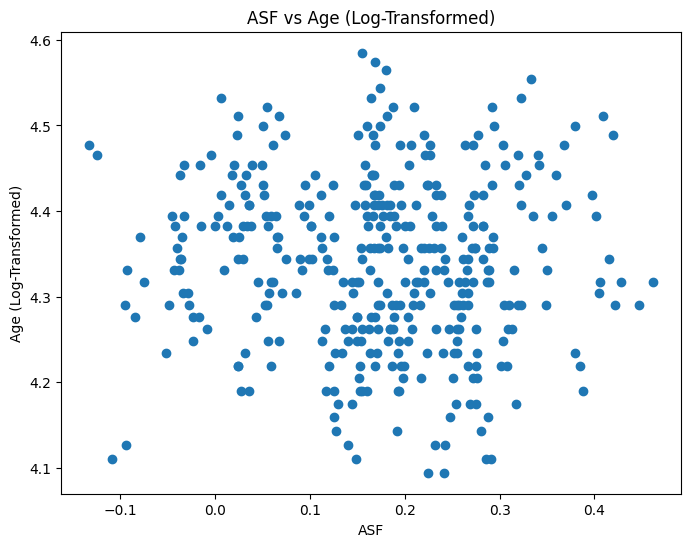

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# List of continuous features you want to transform
continuous_features = ['MMSE','eTIV', 'nWBV', 'ASF']  # Excluding 'Age'

for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        # Apply logarithmic transformation to the feature
        data[feature] = np.log(data[feature])
        data['Age'] = np.log(data['Age'])  # Replaced 'SalePrice' with 'Age'

        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(data[feature], data['Age'])
        plt.xlabel(feature)
        plt.ylabel('Age (Log-Transformed)')  # Adjust the ylabel
        plt.title(f'{feature} vs Age (Log-Transformed)')
        plt.show()


After applying logarithmic transformation, We can see the normally distributed graphs without removing any values from the dataset, the outliers have been treated.